In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import t
from sklearn.metrics import r2_score
import pickle
import math
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
# Importing the data
df1=pd.read_csv("/Users/kranthireddy/Documents/OU 3rd SEM/Data Mining/Final/Project/Datasets/pesticides.csv")
df2=pd.read_csv("/Users/kranthireddy/Documents/OU 3rd SEM/Data Mining/Final/Project/Datasets/rainfall.csv")
df3=pd.read_csv("/Users/kranthireddy/Documents/OU 3rd SEM/Data Mining/Final/Project/Datasets/temp.csv")
df4=pd.read_csv("/Users/kranthireddy/Documents/OU 3rd SEM/Data Mining/Final/Project/Datasets/yield.csv")

In [3]:
# rename, drop and merging of data
df1=df1.drop(['Element','Domain','Unit','Item'], axis=1)
df1=df1.rename(index=str, columns={'Value':'Pesticides (in tonnes)'})

df2 = df2.rename(index=str, columns={" Area": 'Area'})
df2['average_rain_fall_mm_per_year'] = pd.to_numeric(df2['average_rain_fall_mm_per_year'],errors = 'coerce')

df=pd.merge(df1,df2, on=['Area', 'Year'])

df3 = df3.rename(index=str, columns={"year": "Year", "country":'Area'})
df=pd.merge(df,df3, on=['Area','Year'])

df4 = df4.rename(index=str, columns={"Value": "hg/ha_yield"})
df4 = df4.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)

df=pd.merge(df,df4, on=['Area', 'Year'])
print('Initial DataFrame after merging \n',df)

Initial DataFrame after merging 
            Area  Year  Pesticides (in tonnes)  average_rain_fall_mm_per_year  \
0       Albania  1990                  121.00                         1485.0   
1       Albania  1990                  121.00                         1485.0   
2       Albania  1990                  121.00                         1485.0   
3       Albania  1990                  121.00                         1485.0   
4       Albania  1990                  121.00                         1485.0   
...         ...   ...                     ...                            ...   
28243  Zimbabwe  2013                 2550.07                          657.0   
28244  Zimbabwe  2013                 2550.07                          657.0   
28245  Zimbabwe  2013                 2550.07                          657.0   
28246  Zimbabwe  2013                 2550.07                          657.0   
28247  Zimbabwe  2013                 2550.07                          657.0   

     

In [4]:
# Finding the Null Values
print('Checking the Null Values \n',df.isnull().sum())

Checking the Null Values 
 Area                             0
Year                             0
Pesticides (in tonnes)           0
average_rain_fall_mm_per_year    6
avg_temp                         0
Item                             0
hg/ha_yield                      0
dtype: int64


In [5]:
mean = df['average_rain_fall_mm_per_year'].mean()
df['average_rain_fall_mm_per_year'].fillna(value = mean, inplace=True)
print('Verifying the NUll Values agian after replacing with mean \n',df.isnull().sum())

Verifying the NUll Values agian after replacing with mean 
 Area                             0
Year                             0
Pesticides (in tonnes)           0
average_rain_fall_mm_per_year    0
avg_temp                         0
Item                             0
hg/ha_yield                      0
dtype: int64


In [6]:
# Checking the datatypes
print('Checking the datatypes \n',df.dtypes)

Checking the datatypes 
 Area                              object
Year                               int64
Pesticides (in tonnes)           float64
average_rain_fall_mm_per_year    float64
avg_temp                         float64
Item                              object
hg/ha_yield                        int64
dtype: object


In [7]:
# Re-indexing the columns
df = df.reindex(columns=['Area','Item', 'Year', 'Pesticides (in tonnes)', 'average_rain_fall_mm_per_year', 'avg_temp','hg/ha_yield'])
print('DataFrame after indexing \n',df) 

DataFrame after indexing 
            Area            Item  Year  Pesticides (in tonnes)  \
0       Albania           Maize  1990                  121.00   
1       Albania        Potatoes  1990                  121.00   
2       Albania     Rice, paddy  1990                  121.00   
3       Albania         Sorghum  1990                  121.00   
4       Albania        Soybeans  1990                  121.00   
...         ...             ...   ...                     ...   
28243  Zimbabwe     Rice, paddy  2013                 2550.07   
28244  Zimbabwe         Sorghum  2013                 2550.07   
28245  Zimbabwe        Soybeans  2013                 2550.07   
28246  Zimbabwe  Sweet potatoes  2013                 2550.07   
28247  Zimbabwe           Wheat  2013                 2550.07   

       average_rain_fall_mm_per_year  avg_temp  hg/ha_yield  
0                             1485.0     16.37        36613  
1                             1485.0     16.37        66667  
2     

In [8]:
# Removing the unwanted column (Year)
df=df.drop(labels='Year',axis=1)
df.head()

,Area,Item,Pesticides (in tonnes),average_rain_fall_mm_per_year,avg_temp,hg/ha_yield
0,Albania,Maize,121.0,1485.0,16.37,36613
1,Albania,Potatoes,121.0,1485.0,16.37,66667
2,Albania,"Rice, paddy",121.0,1485.0,16.37,23333
3,Albania,Sorghum,121.0,1485.0,16.37,12500
4,Albania,Soybeans,121.0,1485.0,16.37,7000


Boxplot 
 AxesSubplot(0.125,0.125;0.775x0.755)


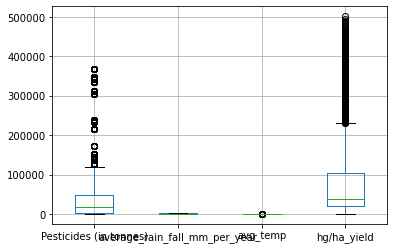

In [9]:
# Checking the outliers via Boxplot
cols=list(df.iloc[:,2:])
print('Boxplot \n',df.boxplot(cols))

In [10]:
# Outliers function to remove outliers
def outliers_function(df):
    q1,q3=df.quantile(0.25),df.quantile(0.75)
    IQR=q3-q1
    low, high=(df<(q1-1.5*IQR)), (df>(q3+1.5*IQR))
    outliers_dropped = df[~(low|high).any(axis=1)]
    return outliers_dropped

In [11]:
data_clean=outliers_function(df)
print('Printing the clean_data \n',data_clean.head())

Printing the clean_data 
       Area         Item  Pesticides (in tonnes)  \
0  Albania        Maize                   121.0   
1  Albania     Potatoes                   121.0   
2  Albania  Rice, paddy                   121.0   
3  Albania      Sorghum                   121.0   
4  Albania     Soybeans                   121.0   

   average_rain_fall_mm_per_year  avg_temp  hg/ha_yield  
0                         1485.0     16.37        36613  
1                         1485.0     16.37        66667  
2                         1485.0     16.37        23333  
3                         1485.0     16.37        12500  
4                         1485.0     16.37         7000  


In [12]:
# Maximum Value of features
print('Max value of Pesticides (in tonnes) = ',max(data_clean['Pesticides (in tonnes)']))
print('Max value of average_rain_fall_mm_per_year = ',max(data_clean['average_rain_fall_mm_per_year']))
print('Max value of avg_temp = ',max(data_clean['avg_temp']))
print('Max value of hg/ha_yield = ',max(data_clean['hg/ha_yield']))

Max value of Pesticides (in tonnes) =  118930.56
Max value of average_rain_fall_mm_per_year =  3240.0
Max value of avg_temp =  30.65
Max value of hg/ha_yield =  231535


In [13]:
# Minimum Value of features
print('Min value of Pesticides (in tonnes) = ',min(data_clean['Pesticides (in tonnes)']))
print('Min value of average_rain_fall_mm_per_year = ',min(data_clean['average_rain_fall_mm_per_year']))
print('Min value of avg_temp = ',min(data_clean['avg_temp']))
print('Min value of hg/ha_yield = ',min(data_clean['hg/ha_yield']))

Min value of Pesticides (in tonnes) =  0.04
Min value of average_rain_fall_mm_per_year =  51.0
Min value of avg_temp =  2.78
Min value of hg/ha_yield =  50


In [14]:
features=data_clean.iloc[:,:5]
label=data_clean.iloc[:,5:]

In [15]:
pickle.dump(features, open('features.pkl', 'wb'))
print("Dumped the data into the Pickles!!")

Dumped the data into the Pickles!!


In [16]:
# Converting categorical data into numerical data
data_clean=pd.get_dummies(data_clean, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=data_clean.loc[:, data_clean.columns != 'hg/ha_yield']
label=data_clean['hg/ha_yield']

In [17]:
# Splitting the data
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [18]:
# Normalizing the data
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train_data) 
test_data=scaler.transform(test_data)

In [19]:
# Class for KNN Regressor Implementation
class knn():
    def __init__(self, num_neighbors = 5):
        self.num_neighbors = num_neighbors
        self.X_train = None
        self.Y_train = None
     
    # Storing the Data
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
    
    # Calculating the distances from all records in training set to a test example
    def distance_calculator(self, X_train, X_test):
        distance = np.sqrt(np.sum(np.square(X_train - X_test), axis = 1))
        return distance
    
    # Finding the indices of k nearest neighbors
    def neighbour_finder(self, X_train, X_test, Y_train):
        distances = self.distance_calculator(X_train, X_test)
        sorted_distances = np.sort(distances)[:self.num_neighbors]
        index = []
        for sd in sorted_distances:
            index.append([l.tolist() for l in np.where(distances == sd)])
        index=sum(sum(index,[]),[])   
        labels = Y_train[index]
        return np.mean(labels)
    
    # Predicting using KNN
    def predict(self, X_test):
        op = []
        for rec in X_test:
            op.append(self.neighbour_finder(self.X_train, rec, self.Y_train))
        return op

In [20]:
# Creating the KNN Regressor
knn_regressor=knn()
# Training the model
ss1 = time.time()
knn_regressor.fit(train_data, np.array(train_labels))
ee1 = time.time()
kt=ee1-ss1

In [21]:
# Prediction on test data
s1 = time.time()
output=knn_regressor.predict(test_data)
e1 = time.time()
knn_time=e1-s1

In [22]:
# we could say that with 95% confidence the expected value of the output lies between 0.979 and 1.021
# Which is significantly and positively skewed.
m=np.mean(output)
s=np.std(output)
diff=len(output)-1
confi=0.95
# t-value
t_val = np.abs(t.ppf((1-confi)/2,diff))
CI_1 = (m-s*t_val/np.sqrt(len(output)), m+s*t_val/np.sqrt(len(output)))/m

pickle.dump(CI_1, open('CI_1.pkl', 'wb'))
print("Dumped the data into the Pickles!!")

Dumped the data into the Pickles!!


In [23]:
# R2_Score Calculation
r2 = r2_score(test_labels,output)
print("The R2_Score of KNN model is ",r2)
MAE = np.mean(abs(test_labels - output), axis=0)
print("The MAE of KNN model is ",MAE)
MSE = np.square(np.subtract(test_labels,output)).mean() 
print("The MSE of KNN model is ",MSE)
RMSE = math.sqrt(MSE)
print("The RMSE of KNN model is ", RMSE)
NRMSE = RMSE/(max(test_labels)-min(test_labels))
print("The NRMSE of KNN model is ",NRMSE)
print("The confidence interval of KNN model is ",CI_1)
print('Execution Time for fitting of KNN Model is ',kt)
print('Execution Time for predicting of KNN Model is ',knn_time)

The R2_Score of KNN model is  0.9423940407864493
The MAE of KNN model is  6359.293035180446
The MSE of KNN model is  178449953.68015808
The RMSE of KNN model is  13358.516148141533
The NRMSE of KNN model is  0.05776755553887
The confidence interval of KNN model is  [0.97883873 1.02116127]
Execution Time for fitting of KNN Model is  0.00010228157043457031
Execution Time for predicting of KNN Model is  31.183881998062134


In [24]:
pickle.dump(r2, open('r2.pkl', 'wb'))
pickle.dump(knn_regressor, open('knn_regressor.pkl', 'wb'))
print("Dumped the data into the Pickles!!")

Dumped the data into the Pickles!!


In [25]:
# Class for Gradient Descent Implementation
class Gradient_descent():
    def __init__(self, epochs = 200, max_depth=3, batch_size = 1000, learning_rate = 0.05, lamb = 0.1, random_state=0):
        self.weights = None
        self.bias = 0
        self.loss_mat =  []
        self.epochs = epochs
        self.batch_size = batch_size
        self.alpha = learning_rate
        self.lamb = lamb
        
    # Training the model    
    def fit(self, input, label):
        self.weights = np.random.rand(np.shape(input)[1])
        self.m = np.shape(input)[0]
        num_batches = self.m//self.batch_size
        print(num_batches)
        for num_epoch in range(self.epochs):
            if num_epoch % 1000 == 0:
                print(num_epoch ," training")
            loss = []
            for i in range(num_batches):
                end_size = (i+1)*self.batch_size
                if i == num_batches:
                    end_size = self.m
                batch_input = input[self.batch_size * i : end_size]
                batch_label = label[self.batch_size * i : end_size]
                batch_size = np.shape(batch_input)[0]
                pred = self.forward_prop(batch_input)
                curr_loss = self.backward_prop(batch_input, batch_label, pred, batch_size)
                loss.append(curr_loss)
            self.loss_mat.append(sum(loss))
    
    # Forward propagation - predicting for training examples
    def forward_prop(self, input):
        return np.dot(input, self.weights) + self.bias
    
    def backward_prop(self, input, y, pred, m):
        loss = (1/(2*m))*np.sum((y-pred)**2)
        slope = (1/m)*(np.dot(input.T, pred- y) + self.lamb * self.weights)
        self.weights -= self.alpha * slope
        self.bias -= (1/m)*self.alpha* np.sum(pred- y)
        return loss
        
    def plot_loss(self):
        plt.plot(self.loss_mat)

In [26]:
# Creating the Gradient Descent Regressor
gradient_regressor = Gradient_descent(epochs = 1001, max_depth=3, lamb = 0.1, random_state=0)
# Training the model
ss2 = time.time()
gradient_regressor.fit(train_data, train_labels)
ee2 = time.time()
gt=ee2-ss2

17
0  training
1000  training


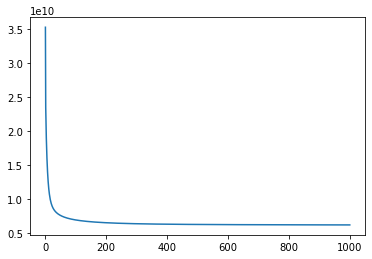

In [27]:
# For plotting the loss
gradient_regressor.plot_loss()

In [28]:
s2 = time.time()
test_pred = gradient_regressor.forward_prop(test_data)
e2 = time.time()
gradient_time=e2-s2

In [29]:
m1=np.mean(test_pred)
s1=np.std(test_pred)
diff1=len(test_pred)-1
confi1=0.95
# t-value
t_val1 = np.abs(t.ppf((1-confi1)/2,diff1))
CI_2 = (m1-s1*t_val1/np.sqrt(len(test_pred)), m1+s1*t_val1/np.sqrt(len(test_pred)))/m1

In [30]:
# R2_Score Calculation
print("The R2_Score of Gradient Descent model is ",r2_score(test_labels,test_pred))
MAE = np.mean(abs(test_labels - test_pred), axis=0)
print("The MAE of Gradient Descent model is ",MAE)
MSE = np.square(np.subtract(test_labels,test_pred)).mean()
print("The MSE of Gradient Descent model is ",MSE)
RMSE = math.sqrt(MSE)
print("The RMSE of Gradient Descent model is ",RMSE)
NRMSE = RMSE/(max(test_labels)-min(test_labels))
print("The NRMSE of Gradient Descent model is ",NRMSE)
print("The confidence interval of Gradient Descent model is ",CI_2)
print('Execution Time for fitting of Gradient Descent Model is ',gt)
print('Execution Time for predicting of Gradient Descent Model is ',gradient_time)

The R2_Score of Gradient Descent model is  0.771234495362196
The MAE of Gradient Descent model is  18920.291097017536
The MSE of Gradient Descent model is  708662684.6173767
The RMSE of Gradient Descent model is  26620.719085279736
The NRMSE of Gradient Descent model is  0.11511861431237615
The confidence interval of Gradient Descent model is  [0.98092217 1.01907783]
Execution Time for fitting of Gradient Descent Model is  12.960124254226685
Execution Time for predicting of Gradient Descent Model is  0.0013971328735351562


In [31]:
# Node definition for decision tree
class Node():
    def __init__(self, index=None, limit=None, left=None, right=None, variance_reduc=None, val=None):
        self.index = index
        self.limit = limit
        self.left = left
        self.right = right
        self.variance_reduc = variance_reduc
        self.val = val

In [32]:
# Class for Decision Model Implementation
class DecisionTreeRegressor():
    def __init__(self, minimum_sample_splits, maximum_depth):
        # root of the tree and stopping conditions initialization
        self.root = None
        self.minimum_sample_splits = minimum_sample_splits
        self.maximum_depth = maximum_depth
    
    # Tree Building Recursive Function
    def tree_building(self, ds, temp_depth=0):
        f, l = ds[:,:-1], ds[:,-1]
        ns, nf = np.shape(f)
        bs = {}
        # Trying to split until stopping conditions are reached and returnig the tree
        if ns>=self.minimum_sample_splits and temp_depth<=self.maximum_depth:
            bs = self.split_best(ds, ns, nf)
            if bs["variance_reduc"]>0:
                lst = self.tree_building(bs["ld"], temp_depth+1)
                rst = self.tree_building(bs["rd"], temp_depth+1)
                return Node(bs["index"], bs["limit"], 
                            lst, rst, bs["variance_reduc"])
        lv = self.lv_calculation(l)
        return Node(val=lv)
    
    # Function to find the split best
    def split_best(self, ds, ns, nf):
        maximum_variance_reduc = -float("inf")
        bs = {}
        for index in range(nf):
            fv = ds[:, index]
            pt = np.unique(fv)
            for limit in pt:
                ld, rd = self.split(ds, index, limit)
                if len(ld)>0 and len(rd)>0:
                    y, ly, ry = ds[:, -1], ld[:, -1], rd[:, -1]
                    temp_vari_redi = self.variance_reduction(y, ly, ry)
                    if temp_vari_redi>maximum_variance_reduc:
                        bs["index"] = index
                        bs["limit"] = limit
                        bs["ld"] = ld
                        bs["rd"] = rd
                        bs["variance_reduc"] = temp_vari_redi
                        maximum_variance_reduc = temp_vari_redi
        return bs
    
    # Data splitting Function
    def split(self, ds, index, limit):        
        ld = np.array([i for i in ds if i[index]<=limit])
        rd = np.array([i for i in ds if i[index]>limit])
        return ld, rd
    
    # Varinace reduction calculation Function
    def variance_reduction(self, main, lc, rc):
        wl = len(lc)/len(main)
        wr = len(rc)/len(main)
        reduction = np.var(main) - (wl * np.var(lc) + wr * np.var(rc))
        return reduction
    
    # Leaf node calculation Function
    def lv_calculation(self, le):        
        res = np.mean(le)
        return res
     
    # Functiion for tree printing
    def tree_printing(self, t=None, inde=" "):      
        if not t:
            t = self.root
        if t.val is not None:
            print(t.val)
        else:
            print("X_"+str(t.index), "<=", t.limit, "?", t.variance_reduc)
            print("%sleft:" % (inde), end="")
            self.tree_printing(t.left, inde + inde)
            print("%sright:" % (inde), end="")
            self.tree_printing(t.right, inde + inde)
    
    # Function for tree training
    def fit(self, f, l):        
        ds = np.concatenate((f, l), axis=1)
        self.root = self.tree_building(ds)
    
    # Function to predict data points
    def prediction(self, x, t):
        if t.val!=None: return t.val
        fv = x[t.index]
        if fv<=t.limit:
            return self.prediction(x, t.left)
        else:
            return self.prediction(x, t.right)
    
    # Function to predict one data point
    def predict(self, f):        
        preditions = [self.prediction(i, self.root) for i in f]
        return preditions

In [33]:
train_labels = train_labels.values.reshape((train_labels.shape[0],1))

In [34]:
# Creating the decision tree object
decision_regressor = DecisionTreeRegressor(minimum_sample_splits=2, maximum_depth=6)
# Training the decision tree
ss3 = time.time()
decision_regressor.fit(train_data, train_labels)
ee3 = time.time()
# Prediction on testing data
s3 = time.time()
test_predict=decision_regressor.predict(test_data)
e3 = time.time()
dt=ee3-ss3
decision_time=e3-s3

In [35]:
m2=np.mean(test_predict)
s2=np.std(test_predict)
diff2=len(test_predict)-1
confi2=0.95
# t-value
t_val2 = np.abs(t.ppf((1-confi2)/2,diff2))
CI_3 = (m2-s2*t_val2/np.sqrt(len(test_predict)), m2+s2*t_val2/np.sqrt(len(test_predict)))/m2

In [36]:
# R2_Score Calculation
print("The R2_Score of Decision tree model is ",r2_score(test_labels,test_predict))
MAE = np.mean(abs(test_labels - test_predict), axis=0)
print("The MAE of Decision tree model is ",MAE)
MSE = np.square(np.subtract(test_labels,test_predict)).mean()
print("The MSE of Decision tree model is ",MSE)
RMSE = math.sqrt(MSE)
print("The RMSE of Decision tree model is ",RMSE)
NRMSE = RMSE/(max(test_labels)-min(test_labels))
print("The NRMSE of Decision tree model is ",NRMSE)
print("The confidence interval of Decision model is ",CI_3)
print('Execution Time for fitting of Decision Model is ',dt)
print('Execution Time for predicting of Decision Model is ',decision_time)

The R2_Score of Decision tree model is  0.8278643570236979
The MAE of Decision tree model is  15854.360765479903
The MSE of Decision tree model is  533236455.6582112
The RMSE of Decision tree model is  23091.913209134735
The NRMSE of Decision tree model is  0.09985864927019164
The confidence interval of Decision model is  [0.98024694 1.01975306]
Execution Time for fitting of Decision Model is  419.21041798591614
Execution Time for predicting of Decision Model is  0.026053190231323242
